<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/digits_recognition_neural_network_tensorboard_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorboard demo using handwritten digits classification using neural network**

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

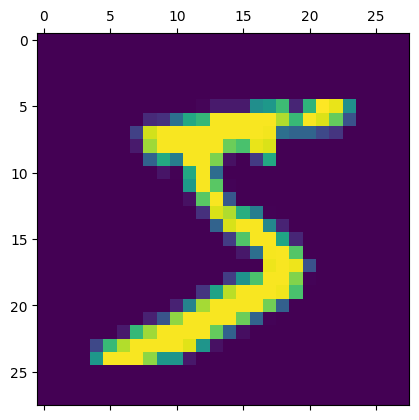

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

np.uint8(5)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

Using Flatten layer so that we don't have to call .reshape on input dataset

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8764 - loss: 0.4436
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9627 - loss: 0.1253
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9742 - loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9805 - loss: 0.0622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9844 - loss: 0.0498


In [12]:
model.get_weights()

[array([[ 0.05207722,  0.07744008,  0.06206849, ..., -0.02244366,
         -0.07850391,  0.02700929],
        [ 0.06170635, -0.02970665,  0.04692732, ...,  0.07600911,
          0.07710405,  0.03238562],
        [ 0.03701065,  0.05187485, -0.0693741 , ...,  0.04296969,
          0.02810856, -0.04886359],
        ...,
        [-0.04535494,  0.03198196, -0.04641395, ..., -0.04766496,
          0.03162349, -0.04159802],
        [-0.07660523, -0.0530477 ,  0.00139163, ...,  0.03697088,
         -0.04195154,  0.07588781],
        [ 0.07128319, -0.07100214,  0.05485785, ..., -0.04332455,
         -0.08015854, -0.02385619]], dtype=float32),
 array([ 0.24871357,  0.0365502 ,  0.1058087 ,  0.09588115,  0.02735526,
         0.05814555, -0.03821791, -0.09170327,  0.08528053,  0.00557327,
         0.07582598, -0.00744127,  0.08708853,  0.01993446,  0.14523834,
         0.09107932, -0.04965496, -0.03834689,  0.05886082,  0.09574555,
        -0.04137878,  0.12088531,  0.02366635,  0.09708546, -0.035